## 10. 올리베타 얼굴 데이터셋 군집하기

*문제: 전통적인 올리베티 얼굴 데이터셋은 64×64 픽셀 크기의 흑백 얼굴 이미지 400개를 담고 있습니다. 각 이미지는 4,096 크기의 1D 벡터로 펼쳐져 있습니다. 사람 40명의 사진을 10장씩 찍은 것입니다. 어떤 사람의 사진인지 예측하는 모델을 훈련하는 것이 일반적입니다. sklearn.datasets.fetch_olivetti_faces() 함수를 사용해 데이터셋을 불러오세요.*

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [122]:
dbscan = DBSCAN()
kmeans = KMeans()
gaumix = GaussianMixture()

In [6]:
from sklearn.datasets import fetch_olivetti_faces

In [7]:
olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\acorn\scikit_learn_data


In [14]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [21]:
print(olivetti.data.shape)
print("-"*50)
print(olivetti.data)
print("-"*50)
print(olivetti.images)
print("-"*50)
print(olivetti.target)


(400, 4096)
--------------------------------------------------
[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]
--------------------------------------------------
[[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
  [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
  [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
  ...
  [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
  [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
  [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.15

*문제: 데이터셋을 훈련 세트, 검증 세트, 테스트 세트로 나눕니다(이 데이터셋은 이미 0에서 1 사이로 스케일이 조정되어 있습니다). 이 데이터셋은 매우 작으니 계층적 샘플링(StratifiedShuffleSplit) 을 사용해 각 세트에 동일한 사람의 얼굴이 고루 섞이도록 하는 것이 좋습니다.*

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit

In [75]:
stratifiedshuffle = StratifiedShuffleSplit(n_splits = 1, test_size = 40, random_state=31)

In [76]:
train_valid_idx,test_idx = next(stratifiedshuffle.split(olivetti.data, olivetti.target))

In [77]:
# train_valid 데이터 vs test 데이터로 만들기 !
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]
#train_valid를 train과 valid로 나누기
strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 80, random_state=41)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [78]:
help(next)

Help on built-in function next in module builtins:

next(...)
    next(iterator[, default])
    
    Return the next item from the iterator. If default is given and the iterator
    is exhausted, it is returned instead of raising StopIteration.



In [79]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(280, 4096)
(280,)
(80, 4096)
(80,)
(40, 4096)
(40,)


속도를 높이기 위해 PCA로 데이터의 차원을 줄입니다:

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(0.99)

In [83]:
X_train_pca = pca.fit_transform(X_train)
#fit은 한번만, fit은 위에 것에만 맞추고 나머지는 pca.transform()만
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

*문제: 그다음 k-평균을 사용해 이미지를 군집해보세요. (이 장에서 소개한 기법 중 하나를 사용해) 적절한 클러스터 개수를 찾아보세요.*

In [99]:
k_range = range(5,150,5)
kmeans_per_k = []
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    print(kmeans)
    kmeans_per_k.append(kmeans)
    print("k={}".format(k))

KMeans(n_clusters=5, random_state=42)
k=5
KMeans(n_clusters=10, random_state=42)
k=10
KMeans(n_clusters=15, random_state=42)
k=15
KMeans(n_clusters=20, random_state=42)
k=20
KMeans(n_clusters=25, random_state=42)
k=25
KMeans(n_clusters=30, random_state=42)
k=30
KMeans(n_clusters=35, random_state=42)
k=35
KMeans(n_clusters=40, random_state=42)
k=40
KMeans(n_clusters=45, random_state=42)
k=45
KMeans(n_clusters=50, random_state=42)
k=50
KMeans(n_clusters=55, random_state=42)
k=55
KMeans(n_clusters=60, random_state=42)
k=60
KMeans(n_clusters=65, random_state=42)
k=65
KMeans(n_clusters=70, random_state=42)
k=70
KMeans(n_clusters=75, random_state=42)
k=75
KMeans(n_clusters=80, random_state=42)
k=80
KMeans(n_clusters=85, random_state=42)
k=85
KMeans(n_clusters=90, random_state=42)
k=90
KMeans(n_clusters=95, random_state=42)
k=95
KMeans(n_clusters=100, random_state=42)
k=100
KMeans(n_clusters=105, random_state=42)
k=105
KMeans(n_clusters=110, random_state=42)
k=110
KMeans(n_clusters=115, rando

best_index:22	best_index: 115	 best_score:0.2223713994026184


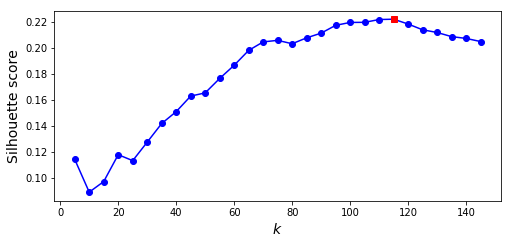

In [126]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]
print("best_index:{}\tbest_index: {}\t best_score:{}".format(best_index,best_k,best_score))
plt.figure(figsize=(8,3.5))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [128]:
best_model = kmeans_per_k[best_index]

In [129]:
help(inertias)

Help on list object:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /

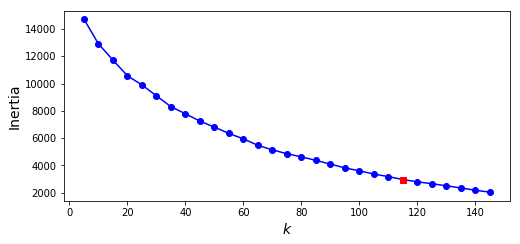

In [130]:
inertias  =[model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8,3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

*문제: 클러스터를 시각화해보세요. 각 클러스터에 비슷한 얼굴이 들어 있나요?*

Cluster 0


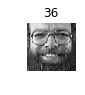

Cluster 1


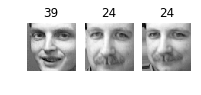

Cluster 2


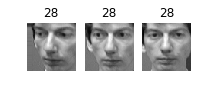

Cluster 3


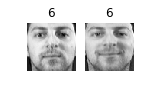

Cluster 4


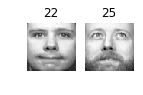

Cluster 5


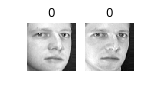

Cluster 6


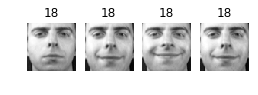

Cluster 7


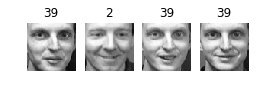

Cluster 8


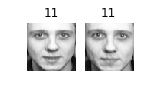

Cluster 9


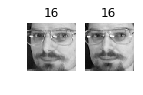

Cluster 10


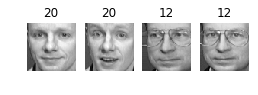

Cluster 11


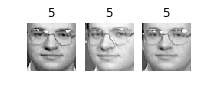

Cluster 12


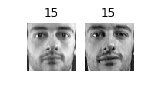

Cluster 13


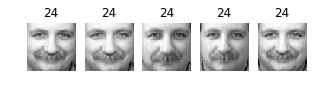

Cluster 14


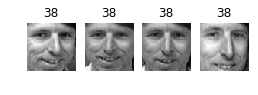

Cluster 15


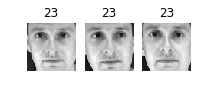

Cluster 16


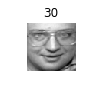

Cluster 17


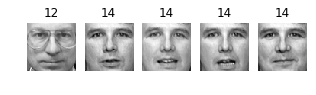

Cluster 18


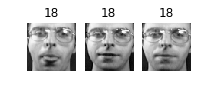

Cluster 19


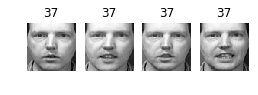

Cluster 20


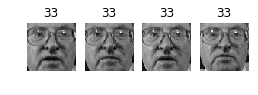

Cluster 21


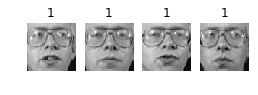

Cluster 22


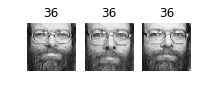

Cluster 23


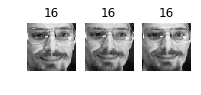

Cluster 24


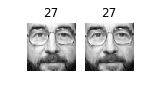

Cluster 25


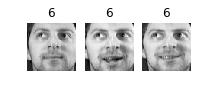

Cluster 26


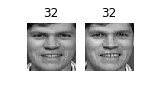

Cluster 27


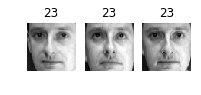

Cluster 28


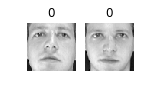

Cluster 29


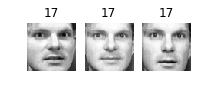

Cluster 30


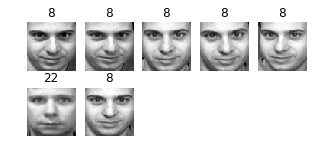

Cluster 31


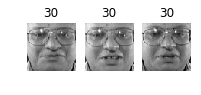

Cluster 32


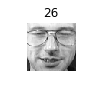

Cluster 33


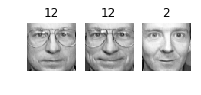

Cluster 34


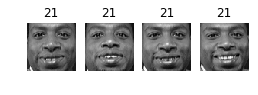

Cluster 35


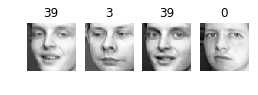

Cluster 36


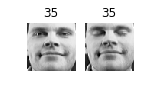

Cluster 37


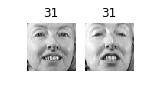

Cluster 38


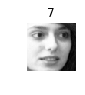

Cluster 39


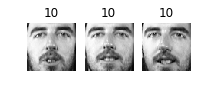

Cluster 40


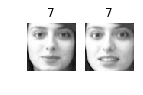

Cluster 41


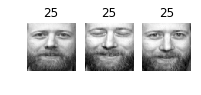

Cluster 42


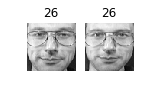

Cluster 43


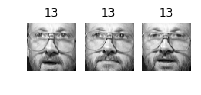

Cluster 44


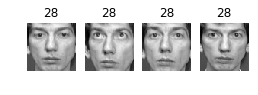

Cluster 45


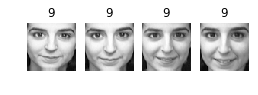

Cluster 46


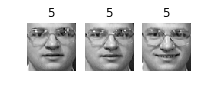

Cluster 47


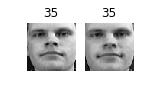

Cluster 48


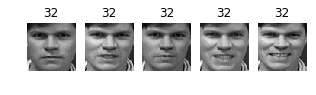

Cluster 49


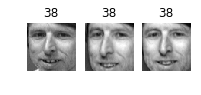

Cluster 50


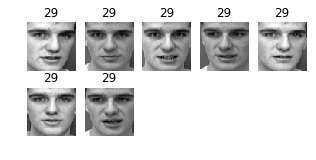

Cluster 51


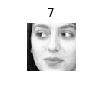

Cluster 52


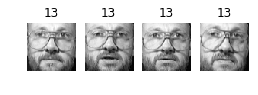

Cluster 53


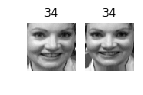

Cluster 54


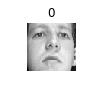

Cluster 55


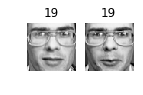

Cluster 56


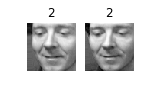

Cluster 57


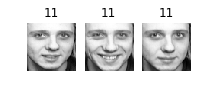

Cluster 58


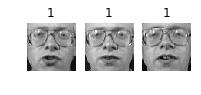

Cluster 59


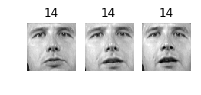

Cluster 60


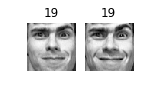

Cluster 61


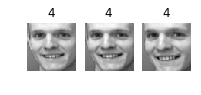

Cluster 62


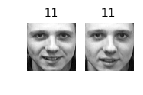

Cluster 63


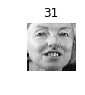

Cluster 64


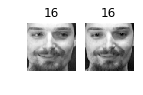

Cluster 65


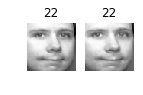

Cluster 66


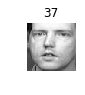

Cluster 67


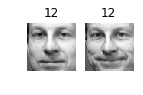

Cluster 68


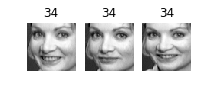

Cluster 69


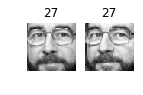

Cluster 70


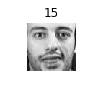

Cluster 71


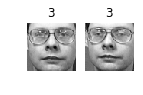

Cluster 72


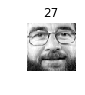

Cluster 73


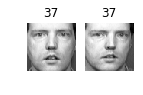

Cluster 74


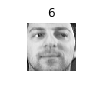

Cluster 75


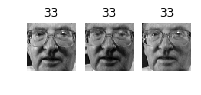

Cluster 76


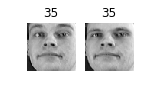

Cluster 77


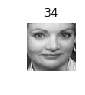

Cluster 78


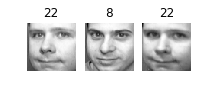

Cluster 79


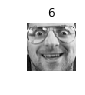

Cluster 80


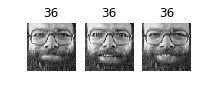

Cluster 81


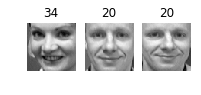

Cluster 82


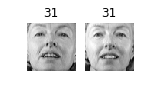

Cluster 83


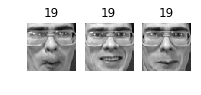

Cluster 84


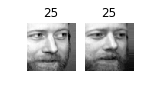

Cluster 85


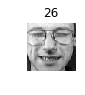

Cluster 86


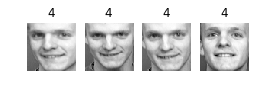

Cluster 87


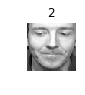

Cluster 88


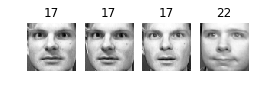

Cluster 89


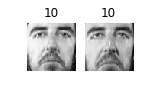

Cluster 90


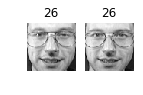

Cluster 91


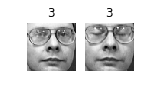

Cluster 92


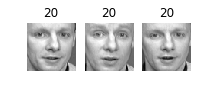

Cluster 93


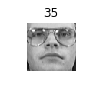

Cluster 94


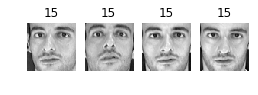

Cluster 95


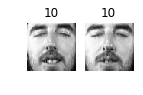

Cluster 96


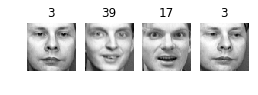

Cluster 97


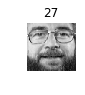

Cluster 98


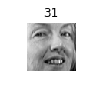

Cluster 99


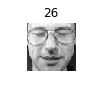

Cluster 100


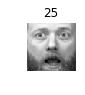

Cluster 101


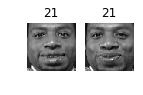

Cluster 102


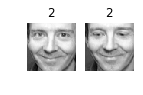

Cluster 103


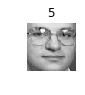

Cluster 104


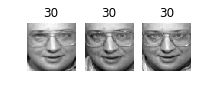

Cluster 105


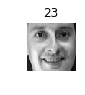

Cluster 106


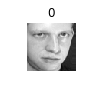

Cluster 107


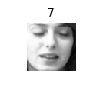

Cluster 108


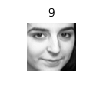

Cluster 109


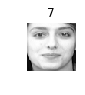

Cluster 110


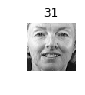

Cluster 111


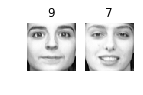

Cluster 112


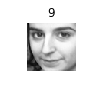

Cluster 113


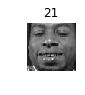

Cluster 114


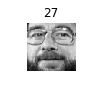

In [131]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)